<a href="https://colab.research.google.com/github/vmacri7/Reinforcement-Learning/blob/main/Project_1_Bandit_Problem_with_Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import numpy as np          
import random                                                    
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick                    
from tqdm import tqdm_notebook as tqdm                        

In [84]:
class model_output:
  def __init__(self, iterations, epsilon, average_R, percent_optimal):
    self.iterations = iterations
    self.epsilon = epsilon
    self.average_R = average_R
    self.percent_optimal = percent_optimal

In [85]:
def simulate(iterations, epsilon, print_info=True):

  total_arms = 10
  mean = np.random.normal(0,1,total_arms)
  optimal = np.argmax(mean)
  optimal_chosen = 0 
  
  Q = np.zeros(total_arms)
  N = np.zeros(total_arms)

  average_R = np.zeros(iterations)                                              # holds values for average return at each step
  iteration_count = np.zeros(iterations)                                        # holds values for iteration count at each step
  percent_optimal = np.zeros(iterations)                                        # holds values for percent of optimal choices at each step

  total_R = 0

  for i in range (iterations):
    
    rand_num = np.random.rand()

    if rand_num <= epsilon:
      chosen_arm = np.random.choice(total_arms)
    else:
      chosen_arm = np.argmax(Q)

    R = np.random.normal(mean[chosen_arm], 1, 1)

    total_R = total_R + R

    N[chosen_arm] = N[chosen_arm] + 1

    Q[chosen_arm] = Q[chosen_arm] + (1/N[chosen_arm])*(R-Q[chosen_arm])

    average_R[i] = total_R/(i+1)

    iteration_count[i] = i

    if chosen_arm == optimal:
      optimal_chosen += 1
      
    if i != 0:
      percent_optimal[i] = optimal_chosen/i                                     # amount of times the optimal arm has been chosen divided
    else:                                                                       # by the total times an arm has been chosen
      percent_optimal[i] = 0

    if percent_optimal[i] > 1:                                                  # caps optimal rate at 100%
      percent_optimal[i] = 1

  if print_info == True:
    print("total reward: ", total_R)
    print("average reward: ", average_R[i])
    print("best option: ", np.argmax(Q))
    print("mean = ", optimal)
    print(percent_optimal)

  output = model_output(iteration_count, epsilon, average_R, percent_optimal)
  return output


In [90]:
def outer_loop(iterations, epsilon, step_count):
  total = np.zeros(iterations)
  total_percent_optimal = np.zeros(iterations)
  totalQ = np.zeros(10)
  totalN = np.zeros(10)

  for i in tqdm(range (step_count)):
    x = simulate(iterations, epsilon, False)
    total += x.average_R
    total_percent_optimal += x.percent_optimal

  avg_reward = 1/step_count * total
  avg_optimal_rate = 1/step_count * total_percent_optimal
  iteration_count = np.arange(0,iterations)
  output = model_output(iteration_count, epsilon, avg_reward, avg_optimal_rate)
  return output


In [95]:
def plot(model):
  plt.plot(model.iterations, model.average_R, label=model.epsilon)
  plt.title("K-Arm Bandit Average Rewards")
  plt.xlabel("Iteration Count")
  plt.ylabel("Average Reward")
  plt.legend(title = "Epsilon Values", fancybox=True)

In [94]:
def plot_optimal(model):
  plt.plot(model.iterations, model.percent_optimal, label=model.epsilon)
  plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))    # puts y axis in percent format
  plt.title("K-Arm Bandit Percent of Optimal Actions")
  plt.xlabel("Iteration Count")
  plt.ylabel("Percent of Optimal Acitons")
  plt.legend(title = "Epsilon Values", fancybox=True)

In [93]:
model1 = outer_loop(3000, 0, 1000)
model2 = outer_loop(3000, 0.01, 1000)
model3 = outer_loop(3000, 0.1, 1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

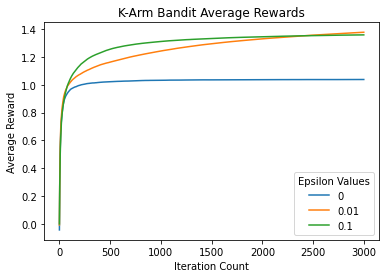

In [98]:
plot(model1)
plot(model2)
plot(model3)

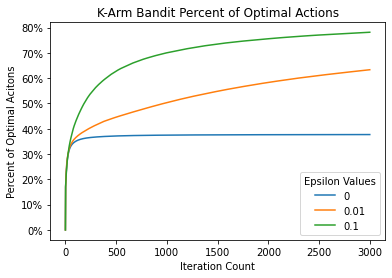

In [99]:
plot_optimal(model1)
plot_optimal(model2)
plot_optimal(model3)